In [146]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [147]:
def scale_num(df):
    
    ss = StandardScaler()
    df_stand = pd.DataFrame(ss.fit_transform(df))
    df_stand.set_index(df.index, inplace=True)
    df_stand.columns = df.columns
    df_stand = df_stand[(np.abs(stats.zscore(df_stand)) < 2.5).all(axis=1)]
    
    return df_stand

In [148]:
def statsmodel_ols(X, y):
    
    X = sm.add_constant(X)
    mod = sm.OLS(y, X, hasconst = True)
    res = mod.fit()
    print(res.summary())
    ax = sm.qqplot(res.resid, line = 'r')
    ax.show()

In [149]:
df = pd.read_pickle('2012 to 2019 Multiunit Chicagoland.pkl')

In [150]:
df.corr().sort_values('List Price').iloc[7:11,:].index

Index(['Fire Pit', 'Park/Playground', 'Tennis Courts', 'Pool'], dtype='object')

In [151]:
uncorr = list(df.corr().sort_values('List Price').iloc[7:11,:].index)
uncorr

['Fire Pit', 'Park/Playground', 'Tennis Courts', 'Pool']

In [152]:
df.drop(columns=uncorr, inplace=True)

In [153]:
X2 = df.drop(columns='List Price')
y2 = df['List Price']

In [154]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 43)
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(4712, 22)
(1179, 22)
(4712,)
(1179,)


In [155]:
X2_train_num = X2_train[['Mean Annual Income', '# Garage Spaces', '# Parking Spaces', 'Total_BRs',
                         'Total_Bath', 'Monthly_Profit']]
X2_train_cat = X2_train.drop(columns=['Mean Annual Income','# Garage Spaces', '# Parking Spaces',
                                      'Total_BRs', 'Total_Bath', 'Monthly_Profit'])
X2_test_num = X2_test[['Mean Annual Income', '# Garage Spaces', '# Parking Spaces', 'Total_BRs',
                       'Total_Bath', 'Monthly_Profit']]
X2_test_cat = X2_test.drop(columns=['Mean Annual Income', '# Garage Spaces', '# Parking Spaces',
                                    'Total_BRs', 'Total_Bath', 'Monthly_Profit'])

In [156]:
X2_train_num_stand = scale_num(X2_train_num)
X2_train_cat = X2_train_cat.loc[X2_train_num_stand.index]
y2_train = y2_train.loc[X2_train_num_stand.index]
X2_train_stand = X2_train_cat.join(X2_train_num_stand)
print(X2_train_stand.shape)
print(y2_train.shape)

(4174, 22)
(4174,)


In [157]:
X2_test_num_stand = scale_num(X2_test_num)
X2_test_cat = X2_test_cat.loc[X2_test_num_stand.index]
y2_test = y2_test.loc[X2_test_num_stand.index]
X2_test_stand = X2_test_cat.join(X2_test_num_stand)
print(X2_test_stand.shape)
print(y2_test.shape)

(1036, 22)
(1036,)


                            OLS Regression Results                            
Dep. Variable:             List Price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     449.5
Date:                Wed, 12 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:45:44   Log-Likelihood:                -55631.
No. Observations:                4174   AIC:                         1.113e+05
Df Residuals:                    4152   BIC:                         1.114e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5.714e+05 

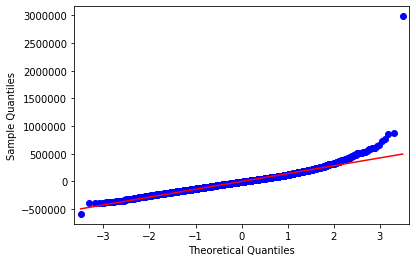

In [162]:
X2_train_stand = sm.add_constant(X2_train_stand)
mod = sm.OLS(y2_train, X2_train_stand, hasconst = True)
res = mod.fit()
y2_train_pred = res.predict(X2_train_stand)
print(res.summary())
ax = sm.qqplot(res.resid, line = 'r')
ax.show()

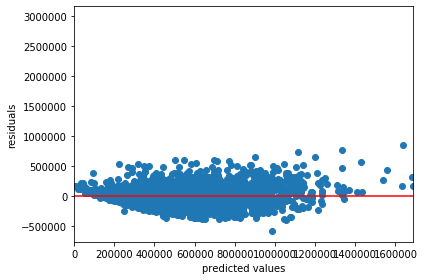

In [164]:
plt.scatter(y_train_pred, res.resid)
plt.axhline(y=0, color = 'red', label = '0')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.xlim(0, y_train_pred.max())
plt.tight_layout()

In [166]:
X2_test_stand = sm.add_constant(X2_test_stand)
mod = sm.OLS(y2_test, X2_test_stand, hasconst = True)
res2 = mod.fit()
y2_test_pred = res2.predict(X2_test_stand)
print(res2.summary())
ax = sm.qqplot(res2.resid, line = 'r')
ax.show()

ValueError: shapes (4174,22) and (23,) not aligned: 22 (dim 1) != 23 (dim 0)

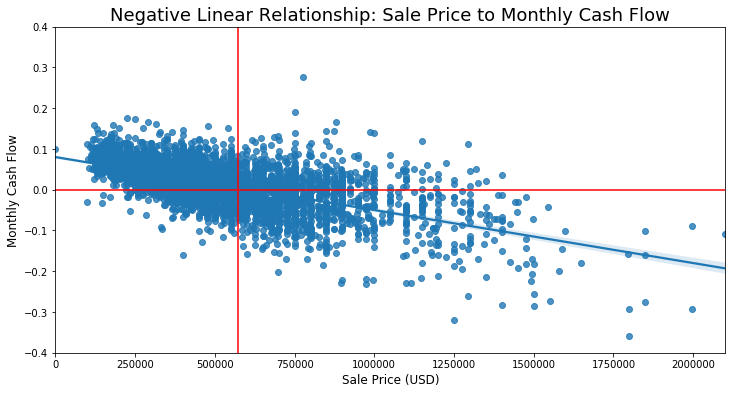

In [161]:
plt.subplots(figsize=(12,6))
sns.regplot(y2_train, X2_train_stand['Monthly_Profit'])
plt.title('Predicting Sale Price with Monthly Cash Flow', fontsize=18)
plt.xlabel('Sale Price (USD)', fontsize=12)
plt.ylabel('Monthly Cash Flow', fontsize=12)
plt.axhline(y=0, color='red')
plt.axvline(x=571000, color='red')
plt.xlim(0,2100000)
plt.ylim(-0.4,.4)
plt.plot()
plt.show()